In [8]:
import math

RPM = 5676
N = 0.8 # efficiency
R_FUEL = 0.15/2 # radius of the ball
D_WHEEL = 0.1016 # diameter of the wheel
V0 = ((RPM * 2 * math.pi)/60 * D_WHEEL/2)/2 * N # exit velocity

m = 0.20366297 # mass of the ball
g = 9.81 # acceleration due to gravity

In [9]:
deltaT = 0.00001

In [10]:
def ax(vx,vy):
    return 0
def ay(vx,vy):
    return -g

In [11]:
def vx(ax, t, oldvx):
    return oldvx + ax * t

def vy(ay, t, oldvy):
    return oldvy + ay * t

def x(vx, t, oldx):
    return oldx + vx * t

def y(vy, t, oldy):
    return oldy + vy * t

In [12]:
import numpy as np

all_scenarios = []

for i in range(1,91):
    theta = math.radians(i)
    vx0 = V0 * math.cos(theta)
    vy0 = V0 * math.sin(theta)

    ax0 = ax(vx0,vy0)
    ay0 = ay(vx0,vy0)
    x0 = 0
    y0 = 0.5334

    velocity = []
    position = []

    for t in np.arange(0,3,deltaT):
        newvy = vy(ay0,deltaT,vy0)
        newvx = vx(ax0,deltaT,vx0)
        newy = y(vy0,deltaT,y0)
        newx = x(vx0,deltaT,x0)
        velocity.append((newvx,newvy))
        position.append((newx,newy))
        ay0 = ay(vx0,vy0)
        ax0 = ax(vx0,vy0)
        vy0 = newvy
        vx0 = newvx
        x0 = newx
        y0 = newy
    
    all_scenarios.append({
        "theta": i,
        "position": position,
        "velocity": velocity
    })

KeyboardInterrupt: 

In [ ]:
for angle in all_scenarios:
    y = [pos[1] for pos in angle["position"]]
    if max(y) > 1.872+R_FUEL:
        print(angle["theta"])
        break

26


In [ ]:
for angle in all_scenarios:
    if angle["theta"] == 26:
        for p in angle["position"]:
            if p[1] < 0:
                print(p[0])
                break

11.495853862077997


26


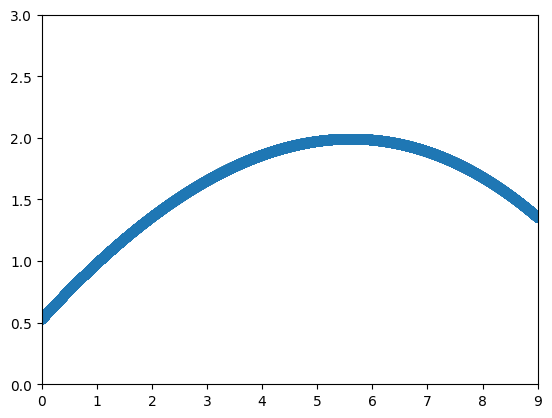

In [ ]:
import matplotlib.pyplot as plt
print(all_scenarios[25]["theta"])

x = [s[0] for s in all_scenarios[25]["position"]]
y = [s[1] for s in all_scenarios[25]["position"]]

plt.xlim(0, 9)
plt.ylim(0, 3)
plt.plot(x, y, 'o')

# 72 degree lookup table for deciding rpm

In [13]:
import numpy as np

all_scenarios = []

for RPM in range(1000,5767,100):
    V0 = ((RPM * 2 * math.pi)/60 * D_WHEEL/2)/2 * N
    vx0 = V0 * math.cos(math.radians(72))
    vy0 = V0 * math.sin(math.radians(72))
    
    ax0 = ax(vx0,vy0)
    ay0 = ay(vx0,vy0)
    x0 = 0
    y0 = 0.5334

    velocity = []
    position = []

    for t in np.arange(0,3,deltaT):
        newvy = vy(ay0,deltaT,vy0)
        newvx = vx(ax0,deltaT,vx0)
        newy = y(vy0,deltaT,y0)
        newx = x(vx0,deltaT,x0)
        velocity.append((newvx,newvy))
        position.append((newx,newy))
        ay0 = ay(vx0,vy0)
        ax0 = ax(vx0,vy0)
        vy0 = newvy
        vx0 = newvx
        x0 = newx
        y0 = newy
    
    all_scenarios.append({
        "RPM": RPM,
        "Position": position,
        "Velocity": velocity
        })

In [14]:
x = []
y = []

for scenario in all_scenarios:
    counter = 0
    for position in scenario["Position"]:
        x = position[0]
        y = position[1]
        if (y > 1.872 + R_FUEL) & (scenario["Velocity"][counter][1] < 0):
            scenario["distance"] = x
            break
        
        counter += 1


In [15]:
final_table = []
for scenario in all_scenarios:
    try:
        print(f"RPM: {scenario['RPM']}, distance: {scenario['distance']}")
        final_table.append({
            'RPM': scenario['RPM'],
            'distance': scenario['distance']
        })
    except Exception as e:
        continue

RPM: 2700, distance: 0.9889028875316842
RPM: 2800, distance: 1.0635121549261077
RPM: 2900, distance: 1.1408345104973259
RPM: 3000, distance: 1.2208699542478054
RPM: 3100, distance: 1.3036184861813298
RPM: 3200, distance: 1.389080106292056
RPM: 3300, distance: 1.4772548145866946
RPM: 3400, distance: 1.5681426110601706
RPM: 3500, distance: 1.661743495711032
RPM: 3600, distance: 1.7580574685415946
RPM: 3700, distance: 1.8570845295536995
RPM: 3800, distance: 1.9588246787439962
RPM: 3900, distance: 2.063277916122676
RPM: 4000, distance: 2.170444241673917
RPM: 4100, distance: 2.280323655403515
RPM: 4200, distance: 2.3929161573191347
RPM: 4300, distance: 2.5082217474115844
RPM: 4400, distance: 2.6262114930889475
RPM: 4500, distance: 2.7469426019879966
RPM: 4600, distance: 2.8703867990606793
RPM: 4700, distance: 2.996544084311723
RPM: 4800, distance: 3.1254144577426115
RPM: 4900, distance: 3.2569979193547325
RPM: 5000, distance: 3.3912944691520552
RPM: 5100, distance: 3.528304107122354
RPM: 52

In [16]:
final_table

[{'RPM': 2700, 'distance': 0.9889028875316842},
 {'RPM': 2800, 'distance': 1.0635121549261077},
 {'RPM': 2900, 'distance': 1.1408345104973259},
 {'RPM': 3000, 'distance': 1.2208699542478054},
 {'RPM': 3100, 'distance': 1.3036184861813298},
 {'RPM': 3200, 'distance': 1.389080106292056},
 {'RPM': 3300, 'distance': 1.4772548145866946},
 {'RPM': 3400, 'distance': 1.5681426110601706},
 {'RPM': 3500, 'distance': 1.661743495711032},
 {'RPM': 3600, 'distance': 1.7580574685415946},
 {'RPM': 3700, 'distance': 1.8570845295536995},
 {'RPM': 3800, 'distance': 1.9588246787439962},
 {'RPM': 3900, 'distance': 2.063277916122676},
 {'RPM': 4000, 'distance': 2.170444241673917},
 {'RPM': 4100, 'distance': 2.280323655403515},
 {'RPM': 4200, 'distance': 2.3929161573191347},
 {'RPM': 4300, 'distance': 2.5082217474115844},
 {'RPM': 4400, 'distance': 2.6262114930889475},
 {'RPM': 4500, 'distance': 2.7469426019879966},
 {'RPM': 4600, 'distance': 2.8703867990606793},
 {'RPM': 4700, 'distance': 2.996544084311723}